In [1]:
import warnings
warnings.filterwarnings("ignore")
from src.load_data import *
from src.metrics import *
from model.model import *
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from nltk.cluster.kmeans import KMeansClusterer

Using TensorFlow backend.


MNIST dataset loaded, scaled but not flattened, available as x and y.


### Baseline

In [2]:
kmeans = KMeans(n_clusters=10)
y_pred_kmeans = kmeans.fit_predict(np.reshape(x, [-1, 28*28]))
print("Baseline accuracy is {:.2%}.".format(acc(y, y_pred_kmeans)))

Baseline accuracy is 48.55%.


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/linear_assignment_.py:21: DeprecationWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


### Custom Autoencoder

In [3]:
batch_size = 1000
k = 15

In [4]:
autoencoder, encoder, decoder = model(batch_size = batch_size, k = k, alpha = 0.1, lamda = 0.001)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
encoder.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 28, 28, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 24, 24, 6)    156         reshape_1[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 12, 12, 6)    0           conv2d_1[0][0]                   
____________________________________________________________________________________________

In [6]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1, 1, 60)          0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 4, 4, 16)          15376     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 8, 8, 16)          1040      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 12, 12, 6)         2406      
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 24, 24, 6)         150       
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 28, 28, 1)         151       
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28)            0   

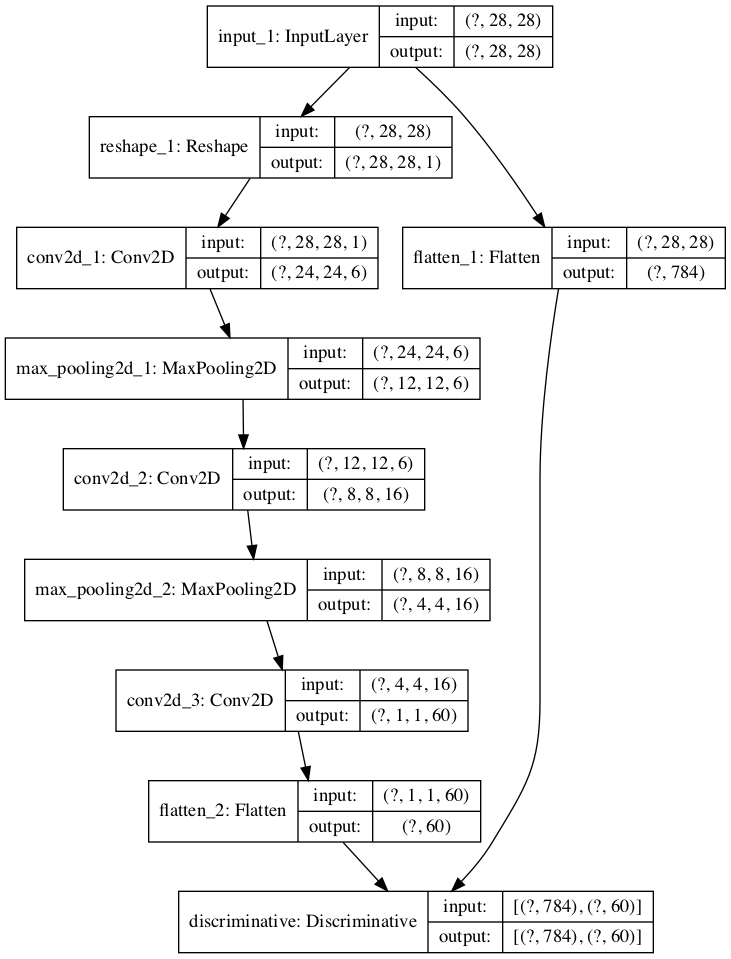

In [7]:
plot_model(encoder, to_file='model.png', show_shapes=True)
Image(filename='model.png', width = 500, height = 500)

In [8]:
autoencoder.fit(x, x, batch_size = batch_size, shuffle = True, epochs = 50, verbose = 1)
_, _, _, hid = encoder.predict(x, batch_size = batch_size)

Epoch 1/50
2000/2000 [==============================] - 13s 7ms/step - loss: 0.1753
Epoch 2/50
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0041
Epoch 3/50
2000/2000 [==============================] - 6s 3ms/step - loss: -0.1090
Epoch 4/50
2000/2000 [==============================] - 5s 2ms/step - loss: -0.1785
Epoch 5/50
2000/2000 [==============================] - 5s 2ms/step - loss: -0.2259
Epoch 6/50
2000/2000 [==============================] - 5s 2ms/step - loss: -0.2606
Epoch 7/50
2000/2000 [==============================] - 6s 3ms/step - loss: -0.2858
Epoch 8/50
2000/2000 [==============================] - 5s 2ms/step - loss: -0.3025
Epoch 9/50
2000/2000 [==============================] - 5s 3ms/step - loss: -0.3078
Epoch 10/50
2000/2000 [==============================] - 6s 3ms/step - loss: -0.3179
Epoch 11/50
2000/2000 [==============================] - 5s 2ms/step - loss: -0.3202
Epoch 12/50
2000/2000 [==============================] - 5s 3ms/step - loss

In [9]:
kmeans = KMeans(n_clusters=10)
y_pretrained_kmeans = kmeans.fit_predict(hid)
print("Baseline accuracy is {:.2%}.".format(acc(y, y_pretrained_kmeans)))

Baseline accuracy is 63.60%.


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/linear_assignment_.py:127: DeprecationWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


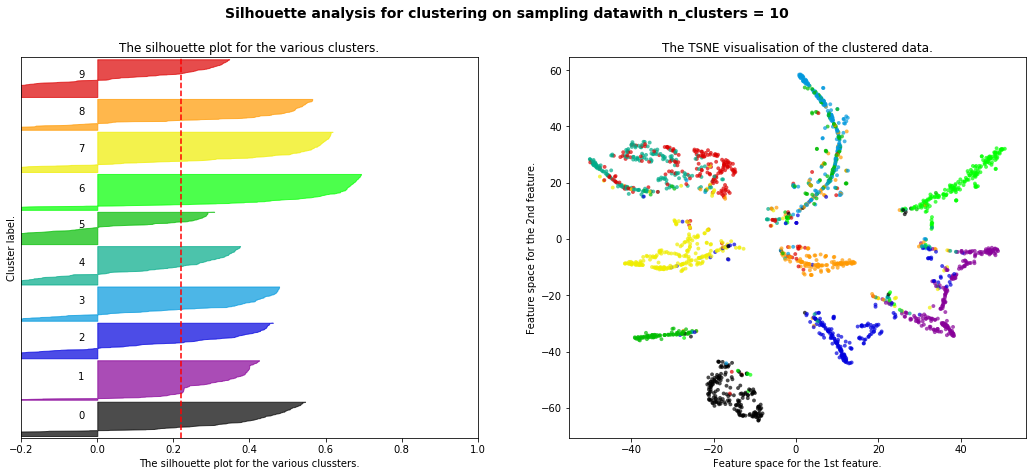

In [10]:
plot_score(np.reshape(hid, [-1, 60]), y, y_pretrained_kmeans)

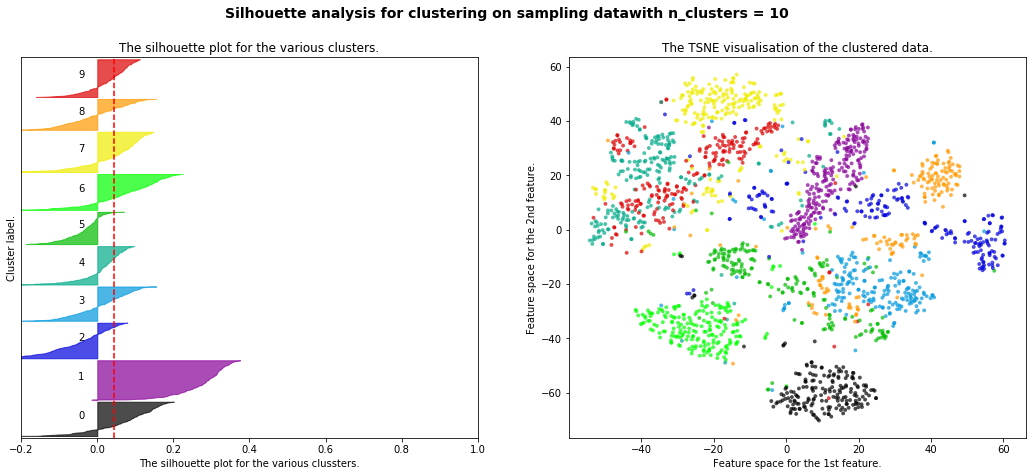

In [11]:
plot_score(np.reshape(x, [-1, 28*28]), y, y_pred_kmeans)